# YOLOv8 Installation

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics==8.0.90
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 33.6/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 21.5M/21.5M [00:00<00:00, 267MB/s]
2024-08-04 12:19:28.906441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 12:19:28.925991: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 12:19:28.932033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

100% 104k/104k [00:00<00:00, 89.9MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 h

/content


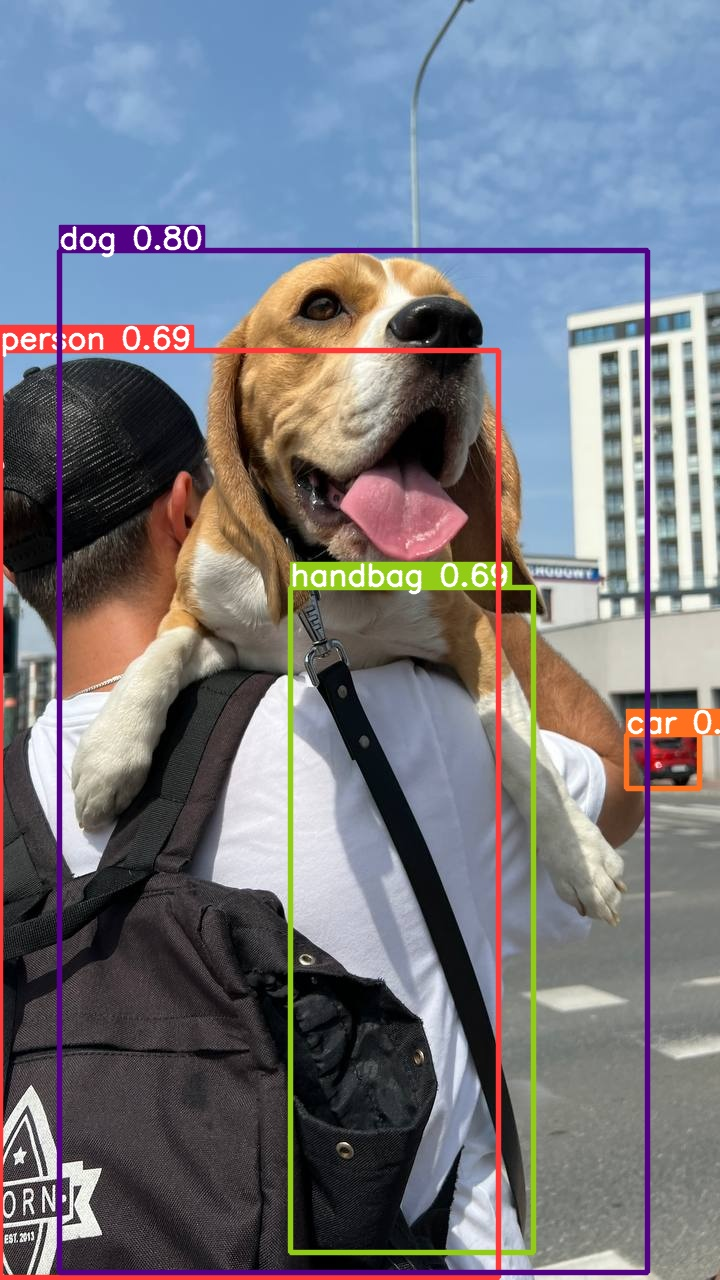

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Training

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XsyxswdqkEg6IzstfJ2X")
project = rf.workspace("myfirstworkspace-jbsfo").project("truck-not-truck")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.90, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Truck-Not-Truck-3 in yolov8:: 100%|██████████| 3080/3080 [00:00<00:00, 4936.47it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/truck-detection/data.yaml epochs=100 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.72 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/truck-detection/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, r

In [ ]:
!zip -r /content/train2.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 38%)
  adding: content/runs/detect/train/results.png (deflated 11%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/train/labels.jpg (deflated 34%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/results.csv (deflated 86%)
  adding: content/runs/detect/train/events.out.tfevents.1722774028.2b68006aa608.3671.0 (deflated 72%)
  adding: content/runs/detect/train/F1_curve.png (deflated 14%)
  adding: content/runs/detect/train/P_curve.png (deflated 18%)
  adding: content/runs/detect/train/R_curve.png (deflated 14%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/train/val_batch0

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/datasets/truck-detection/test/images device=0

2024-08-04 13:19:22.624326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 13:19:22.643812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 13:19:22.649976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 640x640 12 light-vehicles, 16.2ms
imag

In [ ]:
!zip -r /content/predict_train2.zip /content/runs/detect/predict2

  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/505660_151518_20211125_175936_T_jpg.rf.51aec2fdf9ee72edc21458baf420baa1.jpg (deflated 8%)
  adding: content/runs/detect/predict2/505885_152353_20211125_234928_T_jpg.rf.59e96a370164c0d5dbcd3f39bad20cd3.jpg (deflated 7%)
  adding: content/runs/detect/predict2/505882_152353_20211125_234610_T_jpg.rf.5134e02b3a38f8a062bf92fddfc5c007.jpg (deflated 7%)
  adding: content/runs/detect/predict2/505706_151518_20211125_192836_T_jpg.rf.078f2e53d541059a89ba001c48c06db2.jpg (deflated 7%)
  adding: content/runs/detect/predict2/505938_152353_20211126_005552_T_jpg.rf.ea5f524f0e91d7bd8e64055090c2020a.jpg (deflated 7%)
  adding: content/runs/detect/predict2/505404_151775_20211125_103643_T_jpg.rf.e0a23710fcddc104666f4270d40c2998.jpg (deflated 8%)
  adding: content/runs/detect/predict2/505248_151775_20211125_072404_T_jpg.rf.8483bf5e7e64b667fafa9c4243486016.jpg (deflated 7%)
  adding: content/runs/detect/predict2/518755

In [ ]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/truck-detection/data.yaml device=0

2024-08-04 13:19:45.100641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 13:19:45.119723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 13:19:45.125817: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: Runti

In [ ]:
!zip -r /content/val_train2.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 18%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 34%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 17%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 17%)
  adding: content/runs/detect/val/R_curve.png (deflated 14%)
  adding: content/runs/detect/val/PR_curve.png (deflated 24%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 17%)
  adding: content/runs/detect/val/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 17%)
  adding: content/runs/detect/val/P_curve.png (deflated 16%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 19%)


# Pruning

In [ ]:
%pip install torch-pruning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.8 MB/s eta 0:00:00


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 11126358 parameters, 13270 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/154 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.550s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:04<00:00, 36.94it/s]
                   all        154       1360      0.935      0.954      0.977      0.815
         heavy-vehicle        154        161      0.922       0.96      0.973      0.851
         light-vehicle        154       1199      0.948      0.947      0.981      0.779
Speed: 0.8ms preprocess, 11.7ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to 

Before Pruning: MACs= 14.27309 G, #Params= 11.13637 M, mAP= 0.81489


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 9705901 parameters, 13270 gradients, 25.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 57.71it/s]
                   all        154       1360      0.423    0.00459      0.214      0.165
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.846    0.00917      0.428      0.331
Speed: 0.3ms preprocess, 11.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/step_0_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 1: MACs=12.5601712 G, #Params=9.715244 M, mAP=0.16526414619106472, speed up=1.1363771856867684


TensorBoard: Start with 'tensorboard --logdir runs/detect/step_0_finetune', view at http://localhost:6006/
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_0_f

After fine tuning mAP=0.8006849000984506


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8471833 parameters, 13270 gradients, 22.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 51.50it/s]
                   all        154       1360      0.101      0.197      0.142      0.078
         heavy-vehicle        154        161     0.0357    0.00621      0.018     0.0108
         light-vehicle        154       1199      0.167      0.388      0.267      0.145
Speed: 0.4ms preprocess, 9.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_1_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 2: MACs=11.0571144 G, #Params=8.480547 M, mAP=0.0780374290567785, speed up=1.2908514358863827


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_1_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_1_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7938636625377404


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 7448313 parameters, 13270 gradients, 19.6 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 65.14it/s]
                   all        154       1360      0.235    0.00334       0.12     0.0676
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.471    0.00667       0.24      0.135
Speed: 0.4ms preprocess, 10.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/step_2_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 3: MACs=9.8661576 G, #Params=7.456473 M, mAP=0.06763324392222077, speed up=1.446671802607329


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_2_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_2_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7980833988323646


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6538757 parameters, 13270 gradients, 17.5 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 66.45it/s]
                   all        154       1360      0.307     0.0146       0.16     0.0993
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.614     0.0292      0.321      0.199
Speed: 0.4ms preprocess, 9.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/step_3_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 4: MACs=8.7771928 G, #Params=6.546385 M, mAP=0.09931820679636219, speed up=1.6261568277274256


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_3_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_3_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7952855913254437


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5755722 parameters, 13270 gradients, 15.6 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 51.15it/s]
                   all        154       1360      0.555      0.259      0.337      0.203
         heavy-vehicle        154        161      0.314      0.236      0.213      0.153
         light-vehicle        154       1199      0.797      0.281       0.46      0.253
Speed: 0.4ms preprocess, 9.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_4_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 5: MACs=7.83284 G, #Params=5.762858 M, mAP=0.20316258809141385, speed up=1.8222116116249023


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_4_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_4_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7928273678851573


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5065277 parameters, 13270 gradients, 13.9 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 54.29it/s]
                   all        154       1360      0.255      0.213      0.197      0.136
         heavy-vehicle        154        161      0.112      0.205      0.081     0.0597
         light-vehicle        154       1199      0.397       0.22      0.312      0.213
Speed: 0.4ms preprocess, 8.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_5_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 6: MACs=6.9751184 G, #Params=5.071943 M, mAP=0.1362049989752148, speed up=2.046286698158414


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_5_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_5_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7878851323220484


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 4483883 parameters, 13270 gradients, 12.5 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 62.59it/s]
                   all        154       1360     0.0813     0.0163     0.0446     0.0167
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.163     0.0325     0.0891     0.0335
Speed: 0.4ms preprocess, 8.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/step_6_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 7: MACs=6.2826688 G, #Params=4.490131 M, mAP=0.016728083719002633, speed up=2.2718198992122582


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_6_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_6_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7925060375439178


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3975511 parameters, 13270 gradients, 11.3 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 69.23it/s]
                   all        154       1360      0.261       0.01      0.134     0.0768
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.522       0.02      0.268      0.154
Speed: 0.4ms preprocess, 8.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/step_7_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 8: MACs=5.6553072 G, #Params=3.981363 M, mAP=0.07677422115572313, speed up=2.523840261056022


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_7_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_7_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7877689706036186


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3523193 parameters, 13270 gradients, 10.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 66.52it/s]
                   all        154       1360     0.0577     0.0025     0.0294      0.021
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.115      0.005     0.0587      0.042
Speed: 0.4ms preprocess, 8.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/step_8_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 9: MACs=5.1116904 G, #Params=3.528671 M, mAP=0.021009439592738745, speed up=2.792245007639743


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_8_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_8_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7872001026498239


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3132565 parameters, 13270 gradients, 9.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 55.22it/s]
                   all        154       1360     0.0101    0.00334    0.00515    0.00296
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199     0.0203    0.00667     0.0103    0.00593
Speed: 0.7ms preprocess, 8.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_9_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, da

After pruning iter 10: MACs=4.6458784 G, #Params=3.137696 M, mAP=0.0029632942056041648, speed up=3.072205247558782


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_9_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_9_finetune
Starting training for 10 epochs...

      Epoch

After fine tuning mAP=0.7860592574405711


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 2796098 parameters, 13270 gradients, 8.5 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 70.23it/s]
                   all        154       1360          0          0          0          0
Speed: 0.4ms preprocess, 8.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/step_10_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, data=/content/datasets/truck-detection/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s

After pruning iter 11: MACs=4.2539208 G, #Params=2.800912 M, mAP=0.0, speed up=3.355279205010117


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_10_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_10_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.7803565493713079


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 2521344 parameters, 13270 gradients, 7.8 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 56.39it/s]
                   all        154       1360     0.0394     0.0359     0.0236    0.00996
         heavy-vehicle        154        161     0.0625     0.0559     0.0335     0.0115
         light-vehicle        154       1199     0.0163     0.0158     0.0137    0.00842
Speed: 0.4ms preprocess, 8.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_11_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 12: MACs=3.9325416 G, #Params=2.525881 M, mAP=0.00995564909284775, speed up=3.6294827752108203


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_11_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_11_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.781497243478845


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 2268198 parameters, 13270 gradients, 7.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 71.59it/s]
                   all        154       1360      0.219     0.0104      0.114      0.061
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199      0.439     0.0209      0.228      0.122
Speed: 0.4ms preprocess, 8.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/step_12_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 13: MACs=3.6325432 G, #Params=2.272462 M, mAP=0.06100111878609373, speed up=3.9292284259688914


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_12_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_12_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.7836449805688553


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 2050957 parameters, 13270 gradients, 6.7 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 52.03it/s]
                   all        154       1360   0.000635   0.000417   0.000318   0.000254
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199    0.00127   0.000834   0.000636   0.000509
Speed: 0.4ms preprocess, 9.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/step_13_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 14: MACs=3.363128 G, #Params=2.054966 M, mAP=0.0002544937347644696, speed up=4.243993092145169


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_13_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_13_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.762740537037855


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 1862279 parameters, 13270 gradients, 6.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 58.47it/s]
                   all        154       1360    0.00023    0.00167   0.000153   4.67e-05
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199    0.00046    0.00334   0.000307   9.35e-05
Speed: 0.4ms preprocess, 8.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_14_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 15: MACs=3.1398944 G, #Params=1.866055 M, mAP=4.67480628930261e-05, speed up=4.54572357592663


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_14_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_14_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.7721143355038494


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 1702516 parameters, 13270 gradients, 5.8 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 57.39it/s]
                   all        154       1360    0.00308     0.0163    0.00289    0.00121
         heavy-vehicle        154        161          0          0          0          0
         light-vehicle        154       1199    0.00616     0.0325    0.00577    0.00242
Speed: 0.4ms preprocess, 8.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_15_pre_val
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, d

After pruning iter 16: MACs=2.9415224 G, #Params=1.706077 M, mAP=0.0012080841629247112, speed up=4.852280574167989


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
Got processor for bboxes, but no transform to process it.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_15_finetune/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_15_finetune
Starting training for 10 epochs...

      Epo

After fine tuning mAP=0.762655475022421


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 185 layers, 1702516 parameters, 0 gradients, 5.8 GFLOPs

PyTorch: starting from runs/detect/step_15_finetune/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.8 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 266.8 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 5.9s, saved as runs/detect/step_15_finetune/weights/best.onnx (6.7 MB)

Export complete (6.3s)
Results saved to /content/runs/detect/step_15_finetune/weights
Predict:         yolo predict task=detect model=runs/detect/step_15_finetune/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/step_15_finetune/

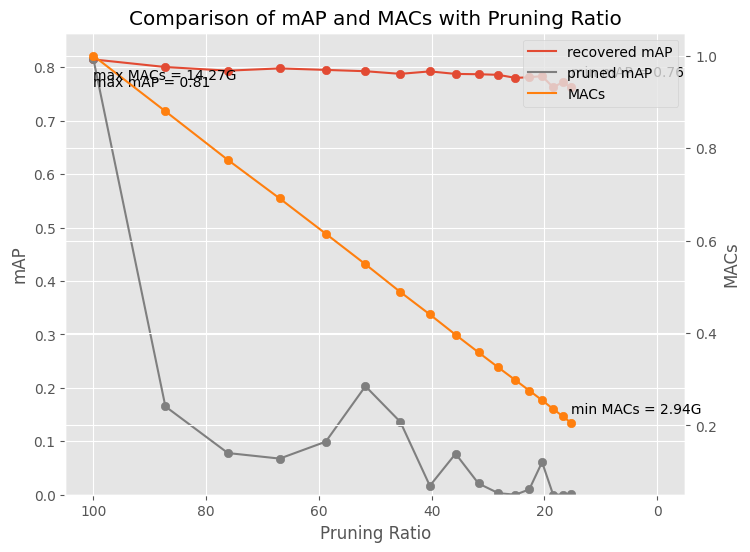

In [ ]:
# This code is adapted from Issue [#147](https://github.com/VainF/Torch-Pruning/issues/147), implemented by @Hyunseok-Kim0.
import argparse
import math
import os
from copy import deepcopy
from datetime import datetime
from pathlib import Path
from typing import List, Union

import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from ultralytics import YOLO, __version__
from ultralytics.nn.modules import Detect, C2f, Conv, Bottleneck
from ultralytics.nn.tasks import attempt_load_one_weight
from ultralytics.yolo.engine.model import TASK_MAP
from ultralytics.yolo.engine.trainer import BaseTrainer
from ultralytics.yolo.utils import yaml_load, LOGGER, RANK, DEFAULT_CFG_DICT, DEFAULT_CFG_KEYS
from ultralytics.yolo.utils.checks import check_yaml
from ultralytics.yolo.utils.torch_utils import initialize_weights, de_parallel

import torch_pruning as tp


def save_pruning_performance_graph(x, y1, y2, y3):
    """
    Draw performance change graph
    Parameters
    ----------
    x : List
        Parameter numbers of all pruning steps
    y1 : List
        mAPs after fine-tuning of all pruning steps
    y2 : List
        MACs of all pruning steps
    y3 : List
        mAPs after pruning (not fine-tuned) of all pruning steps

    Returns
    -------

    """
    try:
        plt.style.use("ggplot")
    except:
        pass

    x, y1, y2, y3 = np.array(x), np.array(y1), np.array(y2), np.array(y3)
    y2_ratio = y2 / y2[0]

    # create the figure and the axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the pruned mAP and recovered mAP
    ax.set_xlabel('Pruning Ratio')
    ax.set_ylabel('mAP')
    ax.plot(x, y1, label='recovered mAP')
    ax.scatter(x, y1)
    ax.plot(x, y3, color='tab:gray', label='pruned mAP')
    ax.scatter(x, y3, color='tab:gray')

    # create a second axis that shares the same x-axis
    ax2 = ax.twinx()

    # plot the second set of data
    ax2.set_ylabel('MACs')
    ax2.plot(x, y2_ratio, color='tab:orange', label='MACs')
    ax2.scatter(x, y2_ratio, color='tab:orange')

    # add a legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    ax.set_xlim(105, -5)
    ax.set_ylim(0, max(y1) + 0.05)
    ax2.set_ylim(0.05, 1.05)

    # calculate the highest and lowest points for each set of data
    max_y1_idx = np.argmax(y1)
    min_y1_idx = np.argmin(y1)
    max_y2_idx = np.argmax(y2)
    min_y2_idx = np.argmin(y2)
    max_y1 = y1[max_y1_idx]
    min_y1 = y1[min_y1_idx]
    max_y2 = y2_ratio[max_y2_idx]
    min_y2 = y2_ratio[min_y2_idx]

    # add text for the highest and lowest values near the points
    ax.text(x[max_y1_idx], max_y1 - 0.05, f'max mAP = {max_y1:.2f}', fontsize=10)
    ax.text(x[min_y1_idx], min_y1 + 0.02, f'min mAP = {min_y1:.2f}', fontsize=10)
    ax2.text(x[max_y2_idx], max_y2 - 0.05, f'max MACs = {max_y2 * y2[0] / 1e9:.2f}G', fontsize=10)
    ax2.text(x[min_y2_idx], min_y2 + 0.02, f'min MACs = {min_y2 * y2[0] / 1e9:.2f}G', fontsize=10)

    plt.title('Comparison of mAP and MACs with Pruning Ratio')
    plt.savefig('pruning_perf_change.png')


def infer_shortcut(bottleneck):
    c1 = bottleneck.cv1.conv.in_channels
    c2 = bottleneck.cv2.conv.out_channels
    return c1 == c2 and hasattr(bottleneck, 'add') and bottleneck.add


class C2f_v2(nn.Module):
    # CSP Bottleneck with 2 convolutions
    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv0 = Conv(c1, self.c, 1, 1)
        self.cv1 = Conv(c1, self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n))

    def forward(self, x):
        # y = list(self.cv1(x).chunk(2, 1))
        y = [self.cv0(x), self.cv1(x)]
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))


def transfer_weights(c2f, c2f_v2):
    c2f_v2.cv2 = c2f.cv2
    c2f_v2.m = c2f.m

    state_dict = c2f.state_dict()
    state_dict_v2 = c2f_v2.state_dict()

    # Transfer cv1 weights from C2f to cv0 and cv1 in C2f_v2
    old_weight = state_dict['cv1.conv.weight']
    half_channels = old_weight.shape[0] // 2
    state_dict_v2['cv0.conv.weight'] = old_weight[:half_channels]
    state_dict_v2['cv1.conv.weight'] = old_weight[half_channels:]

    # Transfer cv1 batchnorm weights and buffers from C2f to cv0 and cv1 in C2f_v2
    for bn_key in ['weight', 'bias', 'running_mean', 'running_var']:
        old_bn = state_dict[f'cv1.bn.{bn_key}']
        state_dict_v2[f'cv0.bn.{bn_key}'] = old_bn[:half_channels]
        state_dict_v2[f'cv1.bn.{bn_key}'] = old_bn[half_channels:]

    # Transfer remaining weights and buffers
    for key in state_dict:
        if not key.startswith('cv1.'):
            state_dict_v2[key] = state_dict[key]

    # Transfer all non-method attributes
    for attr_name in dir(c2f):
        attr_value = getattr(c2f, attr_name)
        if not callable(attr_value) and '_' not in attr_name:
            setattr(c2f_v2, attr_name, attr_value)

    c2f_v2.load_state_dict(state_dict_v2)


def replace_c2f_with_c2f_v2(module):
    for name, child_module in module.named_children():
        if isinstance(child_module, C2f):
            # Replace C2f with C2f_v2 while preserving its parameters
            shortcut = infer_shortcut(child_module.m[0])
            c2f_v2 = C2f_v2(child_module.cv1.conv.in_channels, child_module.cv2.conv.out_channels,
                            n=len(child_module.m), shortcut=shortcut,
                            g=child_module.m[0].cv2.conv.groups,
                            e=child_module.c / child_module.cv2.conv.out_channels)
            transfer_weights(child_module, c2f_v2)
            setattr(module, name, c2f_v2)
        else:
            replace_c2f_with_c2f_v2(child_module)


def save_model_v2(self: BaseTrainer):
    """
    Disabled half precision saving. originated from ultralytics/yolo/engine/trainer.py
    """
    ckpt = {
        'epoch': self.epoch,
        'best_fitness': self.best_fitness,
        'model': deepcopy(de_parallel(self.model)),
        'ema': deepcopy(self.ema.ema),
        'updates': self.ema.updates,
        'optimizer': self.optimizer.state_dict(),
        'train_args': vars(self.args),  # save as dict
        'date': datetime.now().isoformat(),
        'version': __version__}

    # Save last, best and delete
    torch.save(ckpt, self.last)
    if self.best_fitness == self.fitness:
        torch.save(ckpt, self.best)
    if (self.epoch > 0) and (self.save_period > 0) and (self.epoch % self.save_period == 0):
        torch.save(ckpt, self.wdir / f'epoch{self.epoch}.pt')
    del ckpt


def final_eval_v2(self: BaseTrainer):
    """
    originated from ultralytics/yolo/engine/trainer.py
    """
    for f in self.last, self.best:
        if f.exists():
            strip_optimizer_v2(f)  # strip optimizers
            if f is self.best:
                LOGGER.info(f'\nValidating {f}...')
                self.metrics = self.validator(model=f)
                self.metrics.pop('fitness', None)
                self.run_callbacks('on_fit_epoch_end')


def strip_optimizer_v2(f: Union[str, Path] = 'best.pt', s: str = '') -> None:
    """
    Disabled half precision saving. originated from ultralytics/yolo/utils/torch_utils.py
    """
    x = torch.load(f, map_location=torch.device('cpu'))
    args = {**DEFAULT_CFG_DICT, **x['train_args']}  # combine model args with default args, preferring model args
    if x.get('ema'):
        x['model'] = x['ema']  # replace model with ema
    for k in 'optimizer', 'ema', 'updates':  # keys
        x[k] = None
    for p in x['model'].parameters():
        p.requires_grad = False
    x['train_args'] = {k: v for k, v in args.items() if k in DEFAULT_CFG_KEYS}  # strip non-default keys
    # x['model'].args = x['train_args']
    torch.save(x, s or f)
    mb = os.path.getsize(s or f) / 1E6  # filesize
    LOGGER.info(f"Optimizer stripped from {f},{f' saved as {s},' if s else ''} {mb:.1f}MB")


def train_v2(self: YOLO, pruning=False, **kwargs):
    """
    Disabled loading new model when pruning flag is set. originated from ultralytics/yolo/engine/model.py
    """

    self._check_is_pytorch_model()
    if self.session:  # Ultralytics HUB session
        if any(kwargs):
            LOGGER.warning('WARNING ⚠️ using HUB training arguments, ignoring local training arguments.')
        kwargs = self.session.train_args
    overrides = self.overrides.copy()
    overrides.update(kwargs)
    if kwargs.get('cfg'):
        LOGGER.info(f"cfg file passed. Overriding default params with {kwargs['cfg']}.")
        overrides = yaml_load(check_yaml(kwargs['cfg']))
    overrides['mode'] = 'train'
    if not overrides.get('data'):
        raise AttributeError("Dataset required but missing, i.e. pass 'data=coco128.yaml'")
    if overrides.get('resume'):
        overrides['resume'] = self.ckpt_path

    self.task = overrides.get('task') or self.task
    self.trainer = TASK_MAP[self.task][1](overrides=overrides, _callbacks=self.callbacks)

    if not pruning:
        if not overrides.get('resume'):  # manually set model only if not resuming
            self.trainer.model = self.trainer.get_model(weights=self.model if self.ckpt else None, cfg=self.model.yaml)
            self.model = self.trainer.model

    else:
        # pruning mode
        self.trainer.pruning = True
        self.trainer.model = self.model

        # replace some functions to disable half precision saving
        self.trainer.save_model = save_model_v2.__get__(self.trainer)
        self.trainer.final_eval = final_eval_v2.__get__(self.trainer)

    self.trainer.hub_session = self.session  # attach optional HUB session
    self.trainer.train()
    # Update model and cfg after training
    if RANK in (-1, 0):
        self.model, _ = attempt_load_one_weight(str(self.trainer.best))
        self.overrides = self.model.args
        self.metrics = getattr(self.trainer.validator, 'metrics', None)


def prune(args):
    # load trained yolov8 model
    model = YOLO(args.model)
    model.__setattr__("train_v2", train_v2.__get__(model))
    pruning_cfg = yaml_load(check_yaml(args.cfg))
    batch_size = pruning_cfg['batch']

    # use coco128 dataset for 10 epochs fine-tuning each pruning iteration step
    # this part is only for sample code, number of epochs should be included in config file
    pruning_cfg['data'] = "/content/datasets/truck-detection/data.yaml"
    pruning_cfg['epochs'] = 10

    model.model.train()
    replace_c2f_with_c2f_v2(model.model)
    initialize_weights(model.model)  # set BN.eps, momentum, ReLU.inplace

    for name, param in model.model.named_parameters():
        param.requires_grad = True


    example_inputs = torch.randn(1, 3, pruning_cfg["imgsz"], pruning_cfg["imgsz"]).to(model.device)
    macs_list, nparams_list, map_list, pruned_map_list = [], [], [], []
    base_macs, base_nparams = tp.utils.count_ops_and_params(model.model, example_inputs)

    # do validation before pruning model
    pruning_cfg['name'] = f"baseline_val"
    pruning_cfg['batch'] = 1
    validation_model = deepcopy(model)
    metric = validation_model.val(**pruning_cfg)
    init_map = metric.box.map
    macs_list.append(base_macs)
    nparams_list.append(100)
    map_list.append(init_map)
    pruned_map_list.append(init_map)
    print(f"Before Pruning: MACs={base_macs / 1e9: .5f} G, #Params={base_nparams / 1e6: .5f} M, mAP={init_map: .5f}")

    # prune same ratio of filter based on initial size
    pruning_ratio = 1 - math.pow((1 - args.target_prune_rate), 1 / args.iterative_steps)

    for i in range(args.iterative_steps):

        model.model.train()
        for name, param in model.model.named_parameters():
            param.requires_grad = True

        ignored_layers = []
        unwrapped_parameters = []
        for m in model.model.modules():
            if isinstance(m, (Detect,)):
                ignored_layers.append(m)

        example_inputs = example_inputs.to(model.device)
        pruner = tp.pruner.GroupNormPruner(
            model.model,
            example_inputs,
            importance=tp.importance.GroupNormImportance(),  # L2 norm pruning,
            iterative_steps=1,
            pruning_ratio=pruning_ratio,
            ignored_layers=ignored_layers,
            unwrapped_parameters=unwrapped_parameters
        )

        # Test regularization
        #output = model.model(example_inputs)
        #(output[0].sum() + sum([o.sum() for o in output[1]])).backward()
        #pruner.regularize(model.model)

        pruner.step()
        # pre fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_pre_val"
        pruning_cfg['batch'] = 1
        validation_model.model = deepcopy(model.model)
        metric = validation_model.val(**pruning_cfg)
        pruned_map = metric.box.map
        pruned_macs, pruned_nparams = tp.utils.count_ops_and_params(pruner.model, example_inputs.to(model.device))
        current_speed_up = float(macs_list[0]) / pruned_macs
        print(f"After pruning iter {i + 1}: MACs={pruned_macs / 1e9} G, #Params={pruned_nparams / 1e6} M, "
              f"mAP={pruned_map}, speed up={current_speed_up}")

        # fine-tuning
        for name, param in model.model.named_parameters():
            param.requires_grad = True
        pruning_cfg['name'] = f"step_{i}_finetune"
        pruning_cfg['batch'] = batch_size  # restore batch size
        model.train_v2(pruning=True, **pruning_cfg)

        # post fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_post_val"
        pruning_cfg['batch'] = 1
        validation_model = YOLO(model.trainer.best)
        metric = validation_model.val(**pruning_cfg)
        current_map = metric.box.map
        print(f"After fine tuning mAP={current_map}")

        macs_list.append(pruned_macs)
        nparams_list.append(pruned_nparams / base_nparams * 100)
        pruned_map_list.append(pruned_map)
        map_list.append(current_map)

        # remove pruner after single iteration
        del pruner

        save_pruning_performance_graph(nparams_list, map_list, macs_list, pruned_map_list)

        if init_map - current_map > args.max_map_drop:
            print("Pruning early stop")
            break

    model.export(format='onnx')


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--model', default='yolov8m.pt', help='Pretrained pruning target model file')
    parser.add_argument('--cfg', default='default.yaml',
                        help='Pruning config file.'
                             ' This file should have same format with ultralytics/yolo/cfg/default.yaml')
    parser.add_argument('--iterative-steps', default=16, type=int, help='Total pruning iteration step')
    parser.add_argument('--target-prune-rate', default=0.5, type=float, help='Target pruning rate')
    parser.add_argument('--max-map-drop', default=0.2, type=float, help='Allowed maximum map drop after fine-tuning')

    # Parse arguments from a list of strings instead of command line
    args = parser.parse_args(['--model', '/content/runs/detect/train/weights/best.pt',  # Replace with your model path
                               '--cfg', 'default.yaml',
                              '--iterative-steps', '16',
                              '--target-prune-rate', '0.7',
                              '--max-map-drop', '0.1'])  # Replace with your config path

    prune(args)


In [ ]:
!zip -r /content/pruned_07.zip /content/runs/detect/step_15_finetune

  adding: content/runs/detect/step_15_finetune/ (stored 0%)
  adding: content/runs/detect/step_15_finetune/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/step_15_finetune/results.png (deflated 10%)
  adding: content/runs/detect/step_15_finetune/events.out.tfevents.1722782958.2b68006aa608.2831.15 (deflated 72%)
  adding: content/runs/detect/step_15_finetune/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/step_15_finetune/labels.jpg (deflated 40%)
  adding: content/runs/detect/step_15_finetune/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/step_15_finetune/results.csv (deflated 82%)
  adding: content/runs/detect/step_15_finetune/F1_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune/P_curve.png (deflated 15%)
  adding: content/runs/detect/step_15_finetune/R_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/step_15_finetune/val

In [ ]:
!yolo detect predict model=/content/runs/detect/step_15_finetune/weights/best.onnx source=/content/datasets/truck-detection/test/images

2024-08-04 15:00:38.493292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 15:00:38.515000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 15:00:38.521489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune/weights/best.onnx for ONNX Runtime inference...
requirements: YOLOv8 requirement "onnxruntime" not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.

In [ ]:
!zip -r /content/predict_pruned07.zip /content/runs/detect/predict3

  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict3/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict3/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict3/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict3/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict3/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 3%)
  adding: content/runs/detect/predict3/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict3/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/content/runs/detect/step_14_finetune/weights/best.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 185 layers, 4628393 parameters, 0 gradients, 12.6 GFLOPs

PyTorch: starting from /content/runs/detect/step_14_finetune/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (18.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 1.3s, saved as /content/runs/detect/step_14_finetune/weights/best.onnx (17.9 MB)

Export complete (2.1s)
Results saved to /content/runs/detect/step_14_finetune/weights
Predict:         yolo predict task=detect model=/content/runs/detect/step_14_finetune/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/content/runs/detect/step_14_finetune/weights/best.onnx imgsz=640 data=/content/datasets/truck-detection/data.yaml 
Visualize:       https://netron.app


'/content/runs/detect/step_14_finetune/weights/best.onnx'

In [ ]:
!yolo detect val model=/content/runs/detect/step_15_finetune/weights/best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-04 15:01:35.183731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 15:01:35.202753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 15:01:35.208852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune/weights/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]


In [ ]:
!zip -r /content/val_pruned07.zip /content/runs/detect/val2

  adding: content/runs/detect/val2/ (stored 0%)
  adding: content/runs/detect/val2/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/val2/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val2/F1_curve.png (deflated 12%)
  adding: content/runs/detect/val2/P_curve.png (deflated 17%)
  adding: content/runs/detect/val2/R_curve.png (deflated 13%)
  adding: content/runs/detect/val2/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val2/val_batch2_pred.jpg (deflated 1%)
  adding: content/runs/detect/val2/val_batch0_pred.jpg (deflated 2%)
  adding: content/runs/detect/val2/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val2/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val2/PR_curve.png (deflated 20%)


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 11126358 parameters, 13270 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 39.97it/s]
                   all        154       1360      0.935      0.954      0.977      0.815
         heavy-vehicle        154        161      0.922       0.96      0.973      0.851
         light-vehicle        154       1199      0.948      0.947      0.981      0.779
Speed: 0.4ms preprocess, 12.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/baseline_val2


Before Pruning: MACs= 14.27309 G, #Params= 11.13637 M, mAP= 0.81489


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 10283597 parameters, 13270 gradients, 26.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 42.45it/s]
                   all        154       1360      0.437      0.509      0.459      0.343
         heavy-vehicle        154        161      0.316      0.373      0.303      0.235
         light-vehicle        154       1199      0.559      0.646      0.616      0.451
Speed: 0.4ms preprocess, 12.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_0_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 1: MACs=13.2316944 G, #Params=10.293217 M, mAP=0.3429342453433754, speed up=1.078704780243413


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_0_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_0_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7929800329335895


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 9483346 parameters, 13270 gradients, 24.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 49.94it/s]
                   all        154       1360      0.469      0.133      0.302      0.218
         heavy-vehicle        154        161     0.0588    0.00621     0.0318     0.0254
         light-vehicle        154       1199      0.879       0.26      0.573      0.412
Speed: 0.5ms preprocess, 10.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/step_1_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 2: MACs=12.2381536 G, #Params=9.492574 M, mAP=0.21848649787106766, speed up=1.1662782202700903


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_1_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_1_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7949256539320956


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8788851 parameters, 13270 gradients, 22.6 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 43.91it/s]
                   all        154       1360       0.82      0.614      0.795      0.605
         heavy-vehicle        154        161      0.815      0.494      0.739      0.599
         light-vehicle        154       1199      0.824      0.735      0.851      0.611
Speed: 0.4ms preprocess, 11.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_2_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 3: MACs=11.3706376 G, #Params=8.797723 M, mAP=0.605033719605887, speed up=1.2552587200562966


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_2_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_2_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7950319273368324


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8122410 parameters, 13270 gradients, 21.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 57.74it/s]
                   all        154       1360      0.599     0.0738      0.334      0.247
         heavy-vehicle        154        161       0.45     0.0559      0.249      0.196
         light-vehicle        154       1199      0.748     0.0917      0.419      0.299
Speed: 0.4ms preprocess, 9.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/step_3_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 4: MACs=10.5408176 G, #Params=8.130926 M, mAP=0.24743011378034524, speed up=1.3540782642894797


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_3_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_3_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7908957960116945


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 7490853 parameters, 13270 gradients, 19.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 48.49it/s]
                   all        154       1360      0.267       0.42      0.359      0.241
         heavy-vehicle        154        161      0.274      0.267      0.276      0.232
         light-vehicle        154       1199       0.26      0.573      0.443       0.25
Speed: 0.4ms preprocess, 9.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_4_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 5: MACs=9.7516712 G, #Params=7.499017 M, mAP=0.24079735588871953, speed up=1.4636559936516318


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_4_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_4_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7832401018654052


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6926769 parameters, 13270 gradients, 18.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 50.98it/s]
                   all        154       1360      0.419       0.53      0.498      0.354
         heavy-vehicle        154        161      0.209      0.441      0.334      0.262
         light-vehicle        154       1199      0.628       0.62      0.662      0.446
Speed: 0.8ms preprocess, 9.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_5_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 6: MACs=9.0597144 G, #Params=6.934604 M, mAP=0.35360346482016963, speed up=1.5754461310612617


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_5_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_5_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7863554076448743


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6400195 parameters, 13270 gradients, 16.8 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 43.87it/s]
                   all        154       1360      0.879      0.811      0.889      0.653
         heavy-vehicle        154        161      0.831      0.851      0.887      0.689
         light-vehicle        154       1199      0.927      0.771      0.891      0.617
Speed: 0.4ms preprocess, 10.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_6_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 7: MACs=8.4528208 G, #Params=6.407717 M, mAP=0.6528316360027091, speed up=1.6885596344358798


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_6_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_6_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7901315775696232


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5953857 parameters, 13270 gradients, 15.8 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 45.82it/s]
                   all        154       1360       0.88      0.837      0.939      0.746
         heavy-vehicle        154        161      0.805      0.896      0.933       0.78
         light-vehicle        154       1199      0.956      0.777      0.945      0.712
Speed: 0.4ms preprocess, 10.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_7_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 8: MACs=7.9381616 G, #Params=5.961102 M, mAP=0.7455705062125311, speed up=1.7980349505608453


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_7_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_7_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7891283459584362


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5525099 parameters, 13270 gradients, 14.8 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 42.59it/s]
                   all        154       1360      0.879      0.914      0.945      0.742
         heavy-vehicle        154        161      0.818      0.938      0.922      0.757
         light-vehicle        154       1199      0.941       0.89      0.967      0.726
Speed: 0.4ms preprocess, 10.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_8_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 9: MACs=7.4431632 G, #Params=5.532067 M, mAP=0.7416021957677, speed up=1.9176110500976251


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_8_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_8_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7922872247082664


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5119699 parameters, 13270 gradients, 13.9 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 49.53it/s]
                   all        154       1360      0.855      0.333      0.541      0.369
         heavy-vehicle        154        161      0.758      0.253      0.379      0.266
         light-vehicle        154       1199      0.952      0.414      0.703      0.471
Speed: 0.4ms preprocess, 9.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_9_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 10: MACs=6.9703296 G, #Params=5.126394 M, mAP=0.3686034722485515, speed up=2.0476925510093524


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_9_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_9_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7882193006675126


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 4762805 parameters, 13270 gradients, 13.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 47.55it/s]
                   all        154       1360       0.83      0.733       0.82      0.614
         heavy-vehicle        154        161      0.725       0.77       0.77      0.613
         light-vehicle        154       1199      0.935      0.696       0.87      0.616
Speed: 0.4ms preprocess, 9.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_10_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 11: MACs=6.5344696 G, #Params=4.769245 M, mAP=0.614307470465749, speed up=2.1842770528766406


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_10_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_10_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7897545369756871


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 4420401 parameters, 13270 gradients, 12.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 45.99it/s]
                   all        154       1360      0.868      0.878      0.929      0.711
         heavy-vehicle        154        161      0.788      0.913      0.901      0.732
         light-vehicle        154       1199      0.947      0.842      0.958       0.69
Speed: 0.4ms preprocess, 9.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_11_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 12: MACs=6.116708 G, #Params=4.426586 M, mAP=0.7110266175672231, speed up=2.333459762996697


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_11_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_11_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.795765021830724


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 4097737 parameters, 13270 gradients, 11.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 53.14it/s]
                   all        154       1360      0.135      0.359      0.201     0.0926
         heavy-vehicle        154        161      0.148      0.304      0.168      0.096
         light-vehicle        154       1199      0.122      0.415      0.235     0.0893
Speed: 0.4ms preprocess, 8.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_12_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 13: MACs=5.7193088 G, #Params=4.103671 M, mAP=0.09264354582386997, speed up=2.495597370087798


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_12_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_12_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7909483521627514


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3828617 parameters, 13270 gradients, 10.7 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 53.06it/s]
                   all        154       1360      0.342      0.119      0.168     0.0934
         heavy-vehicle        154        161      0.193     0.0124     0.0445     0.0277
         light-vehicle        154       1199       0.49      0.225      0.291      0.159
Speed: 0.4ms preprocess, 8.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_13_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 14: MACs=5.3913608 G, #Params=3.834332 M, mAP=0.09339900385137555, speed up=2.647400633992071


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_13_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_13_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7906543048133452


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3574937 parameters, 13270 gradients, 10.1 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 51.15it/s]
                   all        154       1360      0.373      0.212      0.292      0.209
         heavy-vehicle        154        161      0.242      0.224      0.221       0.17
         light-vehicle        154       1199      0.505        0.2      0.362      0.249
Speed: 0.4ms preprocess, 9.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_14_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 15: MACs=5.0794368 G, #Params=3.580437 M, mAP=0.20921625574345612, speed up=2.8099753106486136


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_14_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_14_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7886845268552303


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 3331447 parameters, 13270 gradients, 9.5 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 52.04it/s]
                   all        154       1360      0.372      0.248      0.282      0.196
         heavy-vehicle        154        161      0.215      0.354       0.22      0.153
         light-vehicle        154       1199       0.53      0.142      0.344      0.238
Speed: 0.7ms preprocess, 8.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_15_pre_val2
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None, 

After pruning iter 16: MACs=4.7812728 G, #Params=3.336732 M, mAP=0.1958995155267343, speed up=2.9852076208661424


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_15_finetune2/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_15_finetune2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7826344217665306


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 185 layers, 3331447 parameters, 0 gradients, 9.5 GFLOPs

PyTorch: starting from runs/detect/step_15_finetune2/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (13.0 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 1.0s, saved as runs/detect/step_15_finetune2/weights/best.onnx (12.9 MB)

Export complete (1.5s)
Results saved to /content/runs/detect/step_15_finetune2/weights
Predict:         yolo predict task=detect model=runs/detect/step_15_finetune2/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/step_15_finetune2/weights/best.onnx imgsz=640 data=/content/datasets/truck-detection/data.yaml 
Visualize:       https://netron.app


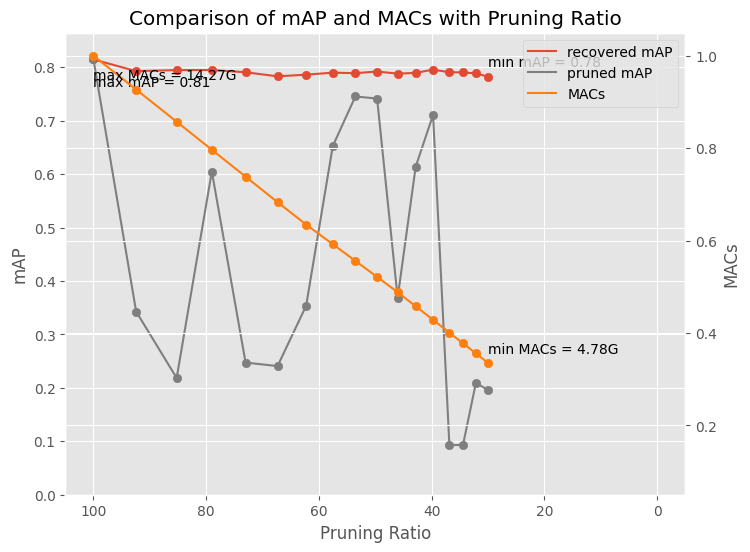

In [ ]:
# This code is adapted from Issue [#147](https://github.com/VainF/Torch-Pruning/issues/147), implemented by @Hyunseok-Kim0.
import argparse
import math
import os
from copy import deepcopy
from datetime import datetime
from pathlib import Path
from typing import List, Union

import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from ultralytics import YOLO, __version__
from ultralytics.nn.modules import Detect, C2f, Conv, Bottleneck
from ultralytics.nn.tasks import attempt_load_one_weight
from ultralytics.yolo.engine.model import TASK_MAP
from ultralytics.yolo.engine.trainer import BaseTrainer
from ultralytics.yolo.utils import yaml_load, LOGGER, RANK, DEFAULT_CFG_DICT, DEFAULT_CFG_KEYS
from ultralytics.yolo.utils.checks import check_yaml
from ultralytics.yolo.utils.torch_utils import initialize_weights, de_parallel

import torch_pruning as tp


def save_pruning_performance_graph(x, y1, y2, y3):
    """
    Draw performance change graph
    Parameters
    ----------
    x : List
        Parameter numbers of all pruning steps
    y1 : List
        mAPs after fine-tuning of all pruning steps
    y2 : List
        MACs of all pruning steps
    y3 : List
        mAPs after pruning (not fine-tuned) of all pruning steps

    Returns
    -------

    """
    try:
        plt.style.use("ggplot")
    except:
        pass

    x, y1, y2, y3 = np.array(x), np.array(y1), np.array(y2), np.array(y3)
    y2_ratio = y2 / y2[0]

    # create the figure and the axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the pruned mAP and recovered mAP
    ax.set_xlabel('Pruning Ratio')
    ax.set_ylabel('mAP')
    ax.plot(x, y1, label='recovered mAP')
    ax.scatter(x, y1)
    ax.plot(x, y3, color='tab:gray', label='pruned mAP')
    ax.scatter(x, y3, color='tab:gray')

    # create a second axis that shares the same x-axis
    ax2 = ax.twinx()

    # plot the second set of data
    ax2.set_ylabel('MACs')
    ax2.plot(x, y2_ratio, color='tab:orange', label='MACs')
    ax2.scatter(x, y2_ratio, color='tab:orange')

    # add a legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    ax.set_xlim(105, -5)
    ax.set_ylim(0, max(y1) + 0.05)
    ax2.set_ylim(0.05, 1.05)

    # calculate the highest and lowest points for each set of data
    max_y1_idx = np.argmax(y1)
    min_y1_idx = np.argmin(y1)
    max_y2_idx = np.argmax(y2)
    min_y2_idx = np.argmin(y2)
    max_y1 = y1[max_y1_idx]
    min_y1 = y1[min_y1_idx]
    max_y2 = y2_ratio[max_y2_idx]
    min_y2 = y2_ratio[min_y2_idx]

    # add text for the highest and lowest values near the points
    ax.text(x[max_y1_idx], max_y1 - 0.05, f'max mAP = {max_y1:.2f}', fontsize=10)
    ax.text(x[min_y1_idx], min_y1 + 0.02, f'min mAP = {min_y1:.2f}', fontsize=10)
    ax2.text(x[max_y2_idx], max_y2 - 0.05, f'max MACs = {max_y2 * y2[0] / 1e9:.2f}G', fontsize=10)
    ax2.text(x[min_y2_idx], min_y2 + 0.02, f'min MACs = {min_y2 * y2[0] / 1e9:.2f}G', fontsize=10)

    plt.title('Comparison of mAP and MACs with Pruning Ratio')
    plt.savefig('pruning_perf_change.png')


def infer_shortcut(bottleneck):
    c1 = bottleneck.cv1.conv.in_channels
    c2 = bottleneck.cv2.conv.out_channels
    return c1 == c2 and hasattr(bottleneck, 'add') and bottleneck.add


class C2f_v2(nn.Module):
    # CSP Bottleneck with 2 convolutions
    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv0 = Conv(c1, self.c, 1, 1)
        self.cv1 = Conv(c1, self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n))

    def forward(self, x):
        # y = list(self.cv1(x).chunk(2, 1))
        y = [self.cv0(x), self.cv1(x)]
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))


def transfer_weights(c2f, c2f_v2):
    c2f_v2.cv2 = c2f.cv2
    c2f_v2.m = c2f.m

    state_dict = c2f.state_dict()
    state_dict_v2 = c2f_v2.state_dict()

    # Transfer cv1 weights from C2f to cv0 and cv1 in C2f_v2
    old_weight = state_dict['cv1.conv.weight']
    half_channels = old_weight.shape[0] // 2
    state_dict_v2['cv0.conv.weight'] = old_weight[:half_channels]
    state_dict_v2['cv1.conv.weight'] = old_weight[half_channels:]

    # Transfer cv1 batchnorm weights and buffers from C2f to cv0 and cv1 in C2f_v2
    for bn_key in ['weight', 'bias', 'running_mean', 'running_var']:
        old_bn = state_dict[f'cv1.bn.{bn_key}']
        state_dict_v2[f'cv0.bn.{bn_key}'] = old_bn[:half_channels]
        state_dict_v2[f'cv1.bn.{bn_key}'] = old_bn[half_channels:]

    # Transfer remaining weights and buffers
    for key in state_dict:
        if not key.startswith('cv1.'):
            state_dict_v2[key] = state_dict[key]

    # Transfer all non-method attributes
    for attr_name in dir(c2f):
        attr_value = getattr(c2f, attr_name)
        if not callable(attr_value) and '_' not in attr_name:
            setattr(c2f_v2, attr_name, attr_value)

    c2f_v2.load_state_dict(state_dict_v2)


def replace_c2f_with_c2f_v2(module):
    for name, child_module in module.named_children():
        if isinstance(child_module, C2f):
            # Replace C2f with C2f_v2 while preserving its parameters
            shortcut = infer_shortcut(child_module.m[0])
            c2f_v2 = C2f_v2(child_module.cv1.conv.in_channels, child_module.cv2.conv.out_channels,
                            n=len(child_module.m), shortcut=shortcut,
                            g=child_module.m[0].cv2.conv.groups,
                            e=child_module.c / child_module.cv2.conv.out_channels)
            transfer_weights(child_module, c2f_v2)
            setattr(module, name, c2f_v2)
        else:
            replace_c2f_with_c2f_v2(child_module)


def save_model_v2(self: BaseTrainer):
    """
    Disabled half precision saving. originated from ultralytics/yolo/engine/trainer.py
    """
    ckpt = {
        'epoch': self.epoch,
        'best_fitness': self.best_fitness,
        'model': deepcopy(de_parallel(self.model)),
        'ema': deepcopy(self.ema.ema),
        'updates': self.ema.updates,
        'optimizer': self.optimizer.state_dict(),
        'train_args': vars(self.args),  # save as dict
        'date': datetime.now().isoformat(),
        'version': __version__}

    # Save last, best and delete
    torch.save(ckpt, self.last)
    if self.best_fitness == self.fitness:
        torch.save(ckpt, self.best)
    if (self.epoch > 0) and (self.save_period > 0) and (self.epoch % self.save_period == 0):
        torch.save(ckpt, self.wdir / f'epoch{self.epoch}.pt')
    del ckpt


def final_eval_v2(self: BaseTrainer):
    """
    originated from ultralytics/yolo/engine/trainer.py
    """
    for f in self.last, self.best:
        if f.exists():
            strip_optimizer_v2(f)  # strip optimizers
            if f is self.best:
                LOGGER.info(f'\nValidating {f}...')
                self.metrics = self.validator(model=f)
                self.metrics.pop('fitness', None)
                self.run_callbacks('on_fit_epoch_end')


def strip_optimizer_v2(f: Union[str, Path] = 'best.pt', s: str = '') -> None:
    """
    Disabled half precision saving. originated from ultralytics/yolo/utils/torch_utils.py
    """
    x = torch.load(f, map_location=torch.device('cpu'))
    args = {**DEFAULT_CFG_DICT, **x['train_args']}  # combine model args with default args, preferring model args
    if x.get('ema'):
        x['model'] = x['ema']  # replace model with ema
    for k in 'optimizer', 'ema', 'updates':  # keys
        x[k] = None
    for p in x['model'].parameters():
        p.requires_grad = False
    x['train_args'] = {k: v for k, v in args.items() if k in DEFAULT_CFG_KEYS}  # strip non-default keys
    # x['model'].args = x['train_args']
    torch.save(x, s or f)
    mb = os.path.getsize(s or f) / 1E6  # filesize
    LOGGER.info(f"Optimizer stripped from {f},{f' saved as {s},' if s else ''} {mb:.1f}MB")


def train_v2(self: YOLO, pruning=False, **kwargs):
    """
    Disabled loading new model when pruning flag is set. originated from ultralytics/yolo/engine/model.py
    """

    self._check_is_pytorch_model()
    if self.session:  # Ultralytics HUB session
        if any(kwargs):
            LOGGER.warning('WARNING ⚠️ using HUB training arguments, ignoring local training arguments.')
        kwargs = self.session.train_args
    overrides = self.overrides.copy()
    overrides.update(kwargs)
    if kwargs.get('cfg'):
        LOGGER.info(f"cfg file passed. Overriding default params with {kwargs['cfg']}.")
        overrides = yaml_load(check_yaml(kwargs['cfg']))
    overrides['mode'] = 'train'
    if not overrides.get('data'):
        raise AttributeError("Dataset required but missing, i.e. pass 'data=coco128.yaml'")
    if overrides.get('resume'):
        overrides['resume'] = self.ckpt_path

    self.task = overrides.get('task') or self.task
    self.trainer = TASK_MAP[self.task][1](overrides=overrides, _callbacks=self.callbacks)

    if not pruning:
        if not overrides.get('resume'):  # manually set model only if not resuming
            self.trainer.model = self.trainer.get_model(weights=self.model if self.ckpt else None, cfg=self.model.yaml)
            self.model = self.trainer.model

    else:
        # pruning mode
        self.trainer.pruning = True
        self.trainer.model = self.model

        # replace some functions to disable half precision saving
        self.trainer.save_model = save_model_v2.__get__(self.trainer)
        self.trainer.final_eval = final_eval_v2.__get__(self.trainer)

    self.trainer.hub_session = self.session  # attach optional HUB session
    self.trainer.train()
    # Update model and cfg after training
    if RANK in (-1, 0):
        self.model, _ = attempt_load_one_weight(str(self.trainer.best))
        self.overrides = self.model.args
        self.metrics = getattr(self.trainer.validator, 'metrics', None)


def prune(args):
    # load trained yolov8 model
    model = YOLO(args.model)
    model.__setattr__("train_v2", train_v2.__get__(model))
    pruning_cfg = yaml_load(check_yaml(args.cfg))
    batch_size = pruning_cfg['batch']

    # use coco128 dataset for 10 epochs fine-tuning each pruning iteration step
    # this part is only for sample code, number of epochs should be included in config file
    pruning_cfg['data'] = "/content/datasets/truck-detection/data.yaml"
    pruning_cfg['epochs'] = 10

    model.model.train()
    replace_c2f_with_c2f_v2(model.model)
    initialize_weights(model.model)  # set BN.eps, momentum, ReLU.inplace

    for name, param in model.model.named_parameters():
        param.requires_grad = True


    example_inputs = torch.randn(1, 3, pruning_cfg["imgsz"], pruning_cfg["imgsz"]).to(model.device)
    macs_list, nparams_list, map_list, pruned_map_list = [], [], [], []
    base_macs, base_nparams = tp.utils.count_ops_and_params(model.model, example_inputs)

    # do validation before pruning model
    pruning_cfg['name'] = f"baseline_val"
    pruning_cfg['batch'] = 1
    validation_model = deepcopy(model)
    metric = validation_model.val(**pruning_cfg)
    init_map = metric.box.map
    macs_list.append(base_macs)
    nparams_list.append(100)
    map_list.append(init_map)
    pruned_map_list.append(init_map)
    print(f"Before Pruning: MACs={base_macs / 1e9: .5f} G, #Params={base_nparams / 1e6: .5f} M, mAP={init_map: .5f}")

    # prune same ratio of filter based on initial size
    pruning_ratio = 1 - math.pow((1 - args.target_prune_rate), 1 / args.iterative_steps)

    for i in range(args.iterative_steps):

        model.model.train()
        for name, param in model.model.named_parameters():
            param.requires_grad = True

        ignored_layers = []
        unwrapped_parameters = []
        for m in model.model.modules():
            if isinstance(m, (Detect,)):
                ignored_layers.append(m)

        example_inputs = example_inputs.to(model.device)
        pruner = tp.pruner.GroupNormPruner(
            model.model,
            example_inputs,
            importance=tp.importance.GroupNormImportance(),  # L2 norm pruning,
            iterative_steps=1,
            pruning_ratio=pruning_ratio,
            ignored_layers=ignored_layers,
            unwrapped_parameters=unwrapped_parameters
        )

        # Test regularization
        #output = model.model(example_inputs)
        #(output[0].sum() + sum([o.sum() for o in output[1]])).backward()
        #pruner.regularize(model.model)

        pruner.step()
        # pre fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_pre_val"
        pruning_cfg['batch'] = 1
        validation_model.model = deepcopy(model.model)
        metric = validation_model.val(**pruning_cfg)
        pruned_map = metric.box.map
        pruned_macs, pruned_nparams = tp.utils.count_ops_and_params(pruner.model, example_inputs.to(model.device))
        current_speed_up = float(macs_list[0]) / pruned_macs
        print(f"After pruning iter {i + 1}: MACs={pruned_macs / 1e9} G, #Params={pruned_nparams / 1e6} M, "
              f"mAP={pruned_map}, speed up={current_speed_up}")

        # fine-tuning
        for name, param in model.model.named_parameters():
            param.requires_grad = True
        pruning_cfg['name'] = f"step_{i}_finetune"
        pruning_cfg['batch'] = batch_size  # restore batch size
        model.train_v2(pruning=True, **pruning_cfg)

        # post fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_post_val"
        pruning_cfg['batch'] = 1
        validation_model = YOLO(model.trainer.best)
        metric = validation_model.val(**pruning_cfg)
        current_map = metric.box.map
        print(f"After fine tuning mAP={current_map}")

        macs_list.append(pruned_macs)
        nparams_list.append(pruned_nparams / base_nparams * 100)
        pruned_map_list.append(pruned_map)
        map_list.append(current_map)

        # remove pruner after single iteration
        del pruner

        save_pruning_performance_graph(nparams_list, map_list, macs_list, pruned_map_list)

        if init_map - current_map > args.max_map_drop:
            print("Pruning early stop")
            break

    model.export(format='onnx')


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--model', default='yolov8m.pt', help='Pretrained pruning target model file')
    parser.add_argument('--cfg', default='default.yaml',
                        help='Pruning config file.'
                             ' This file should have same format with ultralytics/yolo/cfg/default.yaml')
    parser.add_argument('--iterative-steps', default=16, type=int, help='Total pruning iteration step')
    parser.add_argument('--target-prune-rate', default=0.5, type=float, help='Target pruning rate')
    parser.add_argument('--max-map-drop', default=0.2, type=float, help='Allowed maximum map drop after fine-tuning')

    # Parse arguments from a list of strings instead of command line
    args = parser.parse_args(['--model', '/content/runs/detect/train/weights/best.pt',  # Replace with your model path
                               '--cfg', 'default.yaml',
                              '--iterative-steps', '16',
                              '--target-prune-rate', '0.5',
                              '--max-map-drop', '0.1'])  # Replace with your config path

    prune(args)


In [ ]:
!zip -r /content/pruned_05.zip /content/runs/detect/step_15_finetune2

  adding: content/runs/detect/step_15_finetune2/ (stored 0%)
  adding: content/runs/detect/step_15_finetune2/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/step_15_finetune2/results.png (deflated 9%)
  adding: content/runs/detect/step_15_finetune2/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/step_15_finetune2/labels.jpg (deflated 40%)
  adding: content/runs/detect/step_15_finetune2/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/step_15_finetune2/events.out.tfevents.1722788773.2b68006aa608.2831.31 (deflated 72%)
  adding: content/runs/detect/step_15_finetune2/results.csv (deflated 83%)
  adding: content/runs/detect/step_15_finetune2/F1_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune2/P_curve.png (deflated 16%)
  adding: content/runs/detect/step_15_finetune2/R_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune2/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/step_15_f

In [ ]:
!yolo detect predict model=/content/runs/detect/step_15_finetune2/weights/best.onnx source=/content/datasets/truck-detection/test/images

2024-08-04 16:32:53.396978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 16:32:53.417459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 16:32:53.423707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune2/weights/best.onnx for ONNX Runtime inference...

WARNING ⚠️ Source shapes differ. For optimal performance supply similarly-shaped sources.
image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 

In [ ]:
!zip -r /content/predict_pruned05.zip /content/runs/detect/predict4

  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict4/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict4/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict4/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict4/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict4/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 3%)
  adding: content/runs/detect/predict4/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict4/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
!yolo detect val model=/content/runs/detect/step_15_finetune2/weights/best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-04 16:42:42.770104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 16:42:42.789191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 16:42:42.795054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune2/weights/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]

In [ ]:
!zip -r /content/val_pruned05.zip /content/runs/detect/val3

  adding: content/runs/detect/val3/ (stored 0%)
  adding: content/runs/detect/val3/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/val3/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/F1_curve.png (deflated 12%)
  adding: content/runs/detect/val3/P_curve.png (deflated 15%)
  adding: content/runs/detect/val3/R_curve.png (deflated 13%)
  adding: content/runs/detect/val3/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val3/val_batch2_pred.jpg (deflated 1%)
  adding: content/runs/detect/val3/val_batch0_pred.jpg (deflated 2%)
  adding: content/runs/detect/val3/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val3/PR_curve.png (deflated 19%)


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 11126358 parameters, 13270 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 39.78it/s]
                   all        154       1360      0.935      0.954      0.977      0.815
         heavy-vehicle        154        161      0.922       0.96      0.973      0.851
         light-vehicle        154       1199      0.948      0.947      0.981      0.779
Speed: 0.4ms preprocess, 12.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/baseline_val3


Before Pruning: MACs= 14.27309 G, #Params= 11.13637 M, mAP= 0.81489


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 10667275 parameters, 13270 gradients, 27.3 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 41.74it/s]
                   all        154       1360      0.802      0.867      0.895      0.709
         heavy-vehicle        154        161      0.709      0.932      0.865      0.724
         light-vehicle        154       1199      0.895      0.802      0.924      0.695
Speed: 0.4ms preprocess, 12.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_0_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 1: MACs=13.6951392 G, #Params=10.677076 M, mAP=0.7093026019526881, speed up=1.0422013089140416


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_0_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_0_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7993615153015499


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 10218382 parameters, 13270 gradients, 26.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 39.72it/s]
                   all        154       1360      0.878      0.643      0.797      0.619
         heavy-vehicle        154        161      0.794      0.622      0.704      0.576
         light-vehicle        154       1199      0.963      0.665       0.89      0.663
Speed: 0.4ms preprocess, 13.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/step_1_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 2: MACs=13.1309464 G, #Params=10.227968 M, mAP=0.6193657778275617, speed up=1.0869812095189118


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_1_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_1_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.789755665702775


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 9787361 parameters, 13270 gradients, 25.1 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 38.92it/s]
                   all        154       1360      0.875      0.674       0.81      0.632
         heavy-vehicle        154        161      0.868      0.574      0.722      0.596
         light-vehicle        154       1199      0.881      0.774      0.898      0.669
Speed: 0.4ms preprocess, 12.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/step_2_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 3: MACs=12.5838752 G, #Params=9.796736 M, mAP=0.632416765165973, speed up=1.134236614171126


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_2_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_2_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7926000131932133


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 9366230 parameters, 13270 gradients, 24.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 42.72it/s]
                   all        154       1360      0.856      0.712      0.812      0.589
         heavy-vehicle        154        161      0.824       0.61      0.722      0.536
         light-vehicle        154       1199      0.889      0.814      0.902      0.641
Speed: 0.4ms preprocess, 11.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_3_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 4: MACs=12.0504296 G, #Params=9.375394 M, mAP=0.5885528423803766, speed up=1.1844467354093335


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_3_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_3_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7921722301912681


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8954989 parameters, 13270 gradients, 23.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 41.29it/s]
                   all        154       1360      0.894      0.806        0.9        0.7
         heavy-vehicle        154        161       0.96      0.747      0.892      0.742
         light-vehicle        154       1199      0.829      0.865      0.908      0.659
Speed: 0.4ms preprocess, 11.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_4_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 5: MACs=11.5306096 G, #Params=8.963942 M, mAP=0.7004939025596972, speed up=1.2378436609283867


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_4_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_4_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7942351927561131


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8589617 parameters, 13270 gradients, 22.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 43.16it/s]
                   all        154       1360        0.7      0.669      0.705      0.525
         heavy-vehicle        154        161      0.684      0.617      0.647      0.516
         light-vehicle        154       1199      0.716      0.721      0.762      0.533
Speed: 0.4ms preprocess, 11.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_5_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 6: MACs=11.0448272 G, #Params=8.598373 M, mAP=0.5246055647216273, speed up=1.2922874882098654


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_5_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_5_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7900110063729648


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 8239545 parameters, 13270 gradients, 21.1 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 46.31it/s]
                   all        154       1360      0.458      0.398      0.413      0.294
         heavy-vehicle        154        161      0.239      0.441      0.299      0.223
         light-vehicle        154       1199      0.676      0.355      0.528      0.366
Speed: 0.4ms preprocess, 10.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_6_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 7: MACs=10.5748664 G, #Params=8.248108 M, mAP=0.294303015255006, speed up=1.3497184229202177


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_6_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_6_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7964248326534207


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 7897391 parameters, 13270 gradients, 20.1 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:02<00:00, 51.42it/s]
                   all        154       1360      0.496      0.426      0.494      0.358
         heavy-vehicle        154        161      0.308      0.273      0.309      0.254
         light-vehicle        154       1199      0.684      0.578      0.679      0.461
Speed: 0.4ms preprocess, 10.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/step_7_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 8: MACs=10.1175 G, #Params=7.905761 M, mAP=0.3575414572524633, speed up=1.4107330862367184


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_7_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_7_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7974065996162893


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 7563155 parameters, 13270 gradients, 19.3 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 44.33it/s]
                   all        154       1360      0.804      0.782       0.85      0.642
         heavy-vehicle        154        161      0.846      0.671      0.811      0.641
         light-vehicle        154       1199      0.762      0.894      0.888      0.644
Speed: 0.4ms preprocess, 10.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_8_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 9: MACs=9.672728 G, #Params=7.571332 M, mAP=0.6422396105688548, speed up=1.4756015055938718


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_8_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_8_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.7916229951871038


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 7236837 parameters, 13270 gradients, 18.4 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 45.85it/s]
                   all        154       1360      0.754      0.658      0.753      0.579
         heavy-vehicle        154        161      0.606      0.745      0.716       0.59
         light-vehicle        154       1199      0.902      0.571       0.79      0.568
Speed: 0.4ms preprocess, 10.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/step_9_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 10: MACs=9.2405504 G, #Params=7.244821 M, mAP=0.579132385380963, speed up=1.5446149181763025


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_9_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_9_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances 

After fine tuning mAP=0.794355924902227


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6932251 parameters, 13270 gradients, 17.7 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 40.18it/s]
                   all        154       1360      0.934      0.884      0.949      0.753
         heavy-vehicle        154        161      0.908      0.944      0.951      0.803
         light-vehicle        154       1199       0.96      0.825      0.947      0.703
Speed: 0.4ms preprocess, 10.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/step_10_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 11: MACs=8.8756504 G, #Params=6.940058 M, mAP=0.7534064486023906, speed up=1.6081178681846233


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_10_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_10_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7912510420211799


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6634839 parameters, 13270 gradients, 17.0 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 44.12it/s]
                   all        154       1360      0.926      0.898      0.958      0.768
         heavy-vehicle        154        161      0.908      0.917      0.954       0.81
         light-vehicle        154       1199      0.944      0.879      0.962      0.726
Speed: 0.4ms preprocess, 10.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_11_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 12: MACs=8.5195432 G, #Params=6.642469 M, mAP=0.767931079568125, speed up=1.6753353630509205


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_11_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_11_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7901921523137021


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6344601 parameters, 13270 gradients, 16.3 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 42.79it/s]
                   all        154       1360      0.908      0.932       0.96      0.754
         heavy-vehicle        154        161      0.875      0.953      0.949      0.796
         light-vehicle        154       1199      0.941      0.911       0.97      0.712
Speed: 0.8ms preprocess, 10.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_12_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 13: MACs=8.1722288 G, #Params=6.352054 M, mAP=0.7542716819277493, speed up=1.746536024542044


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_12_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_12_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7944312855548329


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 6083703 parameters, 13270 gradients, 15.7 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 43.71it/s]
                   all        154       1360      0.909       0.94      0.965      0.777
         heavy-vehicle        154        161      0.897      0.944      0.962      0.824
         light-vehicle        154       1199      0.922      0.935      0.969       0.73
Speed: 0.4ms preprocess, 10.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/step_13_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None

After pruning iter 14: MACs=7.8813648 G, #Params=6.090997 M, mAP=0.7772635341673483, speed up=1.8109924311586236


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_13_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_13_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7807461647010451


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5857975 parameters, 13270 gradients, 15.2 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 44.30it/s]
                   all        154       1360       0.89      0.837      0.913      0.708
         heavy-vehicle        154        161      0.906       0.82      0.902       0.74
         light-vehicle        154       1199      0.874      0.855      0.924      0.676
Speed: 0.4ms preprocess, 9.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/step_14_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 15: MACs=7.6140272 G, #Params=5.865124 M, mAP=0.7081048572828393, speed up=1.8745785410380462


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_14_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_14_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7894325198439605


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 185 layers, 5642933 parameters, 13270 gradients, 14.6 GFLOPs
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 154/154 [00:03<00:00, 46.25it/s]
                   all        154       1360      0.878      0.647       0.78      0.602
         heavy-vehicle        154        161      0.832      0.613       0.71       0.58
         light-vehicle        154       1199      0.924      0.681       0.85      0.623
Speed: 0.4ms preprocess, 8.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/step_15_pre_val3
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=None,

After pruning iter 16: MACs=7.3553664 G, #Params=5.649941 M, mAP=0.6016992513097652, speed up=1.9405004759518165


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 65 weight(decay=0.0), 72 weight(decay=0.0005), 71 bias
train: Scanning /content/datasets/truck-detection/train/labels.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
Plotting labels to runs/detect/step_15_finetune3/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/step_15_finetune3
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instance

After fine tuning mAP=0.7892623129908231


Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Model summary (fused): 185 layers, 5642933 parameters, 0 gradients, 14.6 GFLOPs

PyTorch: starting from runs/detect/step_15_finetune3/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.9 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 0.9s, saved as runs/detect/step_15_finetune3/weights/best.onnx (21.7 MB)

Export complete (1.6s)
Results saved to /content/runs/detect/step_15_finetune3/weights
Predict:         yolo predict task=detect model=runs/detect/step_15_finetune3/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/step_15_finetune3/weights/best.onnx imgsz=640 data=/content/datasets/truck-detection/data.yaml 
Visualize:       https://netron.app


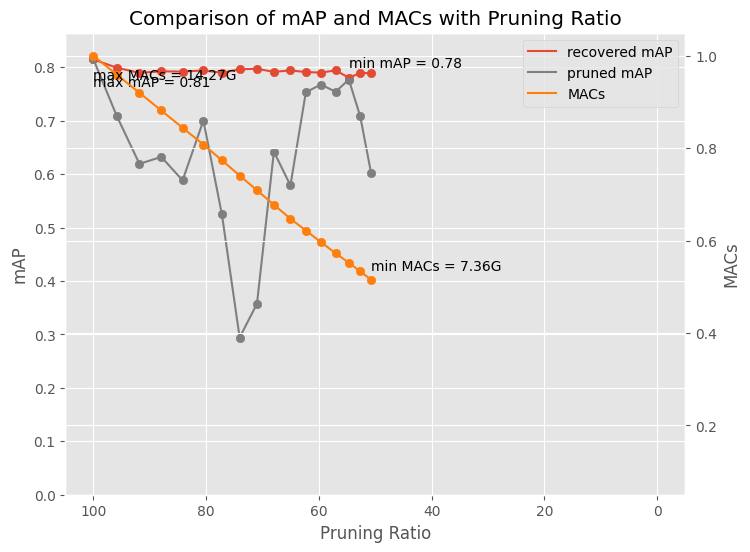

In [ ]:
# This code is adapted from Issue [#147](https://github.com/VainF/Torch-Pruning/issues/147), implemented by @Hyunseok-Kim0.
import argparse
import math
import os
from copy import deepcopy
from datetime import datetime
from pathlib import Path
from typing import List, Union

import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from ultralytics import YOLO, __version__
from ultralytics.nn.modules import Detect, C2f, Conv, Bottleneck
from ultralytics.nn.tasks import attempt_load_one_weight
from ultralytics.yolo.engine.model import TASK_MAP
from ultralytics.yolo.engine.trainer import BaseTrainer
from ultralytics.yolo.utils import yaml_load, LOGGER, RANK, DEFAULT_CFG_DICT, DEFAULT_CFG_KEYS
from ultralytics.yolo.utils.checks import check_yaml
from ultralytics.yolo.utils.torch_utils import initialize_weights, de_parallel

import torch_pruning as tp


def save_pruning_performance_graph(x, y1, y2, y3):
    """
    Draw performance change graph
    Parameters
    ----------
    x : List
        Parameter numbers of all pruning steps
    y1 : List
        mAPs after fine-tuning of all pruning steps
    y2 : List
        MACs of all pruning steps
    y3 : List
        mAPs after pruning (not fine-tuned) of all pruning steps

    Returns
    -------

    """
    try:
        plt.style.use("ggplot")
    except:
        pass

    x, y1, y2, y3 = np.array(x), np.array(y1), np.array(y2), np.array(y3)
    y2_ratio = y2 / y2[0]

    # create the figure and the axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the pruned mAP and recovered mAP
    ax.set_xlabel('Pruning Ratio')
    ax.set_ylabel('mAP')
    ax.plot(x, y1, label='recovered mAP')
    ax.scatter(x, y1)
    ax.plot(x, y3, color='tab:gray', label='pruned mAP')
    ax.scatter(x, y3, color='tab:gray')

    # create a second axis that shares the same x-axis
    ax2 = ax.twinx()

    # plot the second set of data
    ax2.set_ylabel('MACs')
    ax2.plot(x, y2_ratio, color='tab:orange', label='MACs')
    ax2.scatter(x, y2_ratio, color='tab:orange')

    # add a legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    ax.set_xlim(105, -5)
    ax.set_ylim(0, max(y1) + 0.05)
    ax2.set_ylim(0.05, 1.05)

    # calculate the highest and lowest points for each set of data
    max_y1_idx = np.argmax(y1)
    min_y1_idx = np.argmin(y1)
    max_y2_idx = np.argmax(y2)
    min_y2_idx = np.argmin(y2)
    max_y1 = y1[max_y1_idx]
    min_y1 = y1[min_y1_idx]
    max_y2 = y2_ratio[max_y2_idx]
    min_y2 = y2_ratio[min_y2_idx]

    # add text for the highest and lowest values near the points
    ax.text(x[max_y1_idx], max_y1 - 0.05, f'max mAP = {max_y1:.2f}', fontsize=10)
    ax.text(x[min_y1_idx], min_y1 + 0.02, f'min mAP = {min_y1:.2f}', fontsize=10)
    ax2.text(x[max_y2_idx], max_y2 - 0.05, f'max MACs = {max_y2 * y2[0] / 1e9:.2f}G', fontsize=10)
    ax2.text(x[min_y2_idx], min_y2 + 0.02, f'min MACs = {min_y2 * y2[0] / 1e9:.2f}G', fontsize=10)

    plt.title('Comparison of mAP and MACs with Pruning Ratio')
    plt.savefig('pruning_perf_change.png')


def infer_shortcut(bottleneck):
    c1 = bottleneck.cv1.conv.in_channels
    c2 = bottleneck.cv2.conv.out_channels
    return c1 == c2 and hasattr(bottleneck, 'add') and bottleneck.add


class C2f_v2(nn.Module):
    # CSP Bottleneck with 2 convolutions
    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv0 = Conv(c1, self.c, 1, 1)
        self.cv1 = Conv(c1, self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n))

    def forward(self, x):
        # y = list(self.cv1(x).chunk(2, 1))
        y = [self.cv0(x), self.cv1(x)]
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))


def transfer_weights(c2f, c2f_v2):
    c2f_v2.cv2 = c2f.cv2
    c2f_v2.m = c2f.m

    state_dict = c2f.state_dict()
    state_dict_v2 = c2f_v2.state_dict()

    # Transfer cv1 weights from C2f to cv0 and cv1 in C2f_v2
    old_weight = state_dict['cv1.conv.weight']
    half_channels = old_weight.shape[0] // 2
    state_dict_v2['cv0.conv.weight'] = old_weight[:half_channels]
    state_dict_v2['cv1.conv.weight'] = old_weight[half_channels:]

    # Transfer cv1 batchnorm weights and buffers from C2f to cv0 and cv1 in C2f_v2
    for bn_key in ['weight', 'bias', 'running_mean', 'running_var']:
        old_bn = state_dict[f'cv1.bn.{bn_key}']
        state_dict_v2[f'cv0.bn.{bn_key}'] = old_bn[:half_channels]
        state_dict_v2[f'cv1.bn.{bn_key}'] = old_bn[half_channels:]

    # Transfer remaining weights and buffers
    for key in state_dict:
        if not key.startswith('cv1.'):
            state_dict_v2[key] = state_dict[key]

    # Transfer all non-method attributes
    for attr_name in dir(c2f):
        attr_value = getattr(c2f, attr_name)
        if not callable(attr_value) and '_' not in attr_name:
            setattr(c2f_v2, attr_name, attr_value)

    c2f_v2.load_state_dict(state_dict_v2)


def replace_c2f_with_c2f_v2(module):
    for name, child_module in module.named_children():
        if isinstance(child_module, C2f):
            # Replace C2f with C2f_v2 while preserving its parameters
            shortcut = infer_shortcut(child_module.m[0])
            c2f_v2 = C2f_v2(child_module.cv1.conv.in_channels, child_module.cv2.conv.out_channels,
                            n=len(child_module.m), shortcut=shortcut,
                            g=child_module.m[0].cv2.conv.groups,
                            e=child_module.c / child_module.cv2.conv.out_channels)
            transfer_weights(child_module, c2f_v2)
            setattr(module, name, c2f_v2)
        else:
            replace_c2f_with_c2f_v2(child_module)


def save_model_v2(self: BaseTrainer):
    """
    Disabled half precision saving. originated from ultralytics/yolo/engine/trainer.py
    """
    ckpt = {
        'epoch': self.epoch,
        'best_fitness': self.best_fitness,
        'model': deepcopy(de_parallel(self.model)),
        'ema': deepcopy(self.ema.ema),
        'updates': self.ema.updates,
        'optimizer': self.optimizer.state_dict(),
        'train_args': vars(self.args),  # save as dict
        'date': datetime.now().isoformat(),
        'version': __version__}

    # Save last, best and delete
    torch.save(ckpt, self.last)
    if self.best_fitness == self.fitness:
        torch.save(ckpt, self.best)
    if (self.epoch > 0) and (self.save_period > 0) and (self.epoch % self.save_period == 0):
        torch.save(ckpt, self.wdir / f'epoch{self.epoch}.pt')
    del ckpt


def final_eval_v2(self: BaseTrainer):
    """
    originated from ultralytics/yolo/engine/trainer.py
    """
    for f in self.last, self.best:
        if f.exists():
            strip_optimizer_v2(f)  # strip optimizers
            if f is self.best:
                LOGGER.info(f'\nValidating {f}...')
                self.metrics = self.validator(model=f)
                self.metrics.pop('fitness', None)
                self.run_callbacks('on_fit_epoch_end')


def strip_optimizer_v2(f: Union[str, Path] = 'best.pt', s: str = '') -> None:
    """
    Disabled half precision saving. originated from ultralytics/yolo/utils/torch_utils.py
    """
    x = torch.load(f, map_location=torch.device('cpu'))
    args = {**DEFAULT_CFG_DICT, **x['train_args']}  # combine model args with default args, preferring model args
    if x.get('ema'):
        x['model'] = x['ema']  # replace model with ema
    for k in 'optimizer', 'ema', 'updates':  # keys
        x[k] = None
    for p in x['model'].parameters():
        p.requires_grad = False
    x['train_args'] = {k: v for k, v in args.items() if k in DEFAULT_CFG_KEYS}  # strip non-default keys
    # x['model'].args = x['train_args']
    torch.save(x, s or f)
    mb = os.path.getsize(s or f) / 1E6  # filesize
    LOGGER.info(f"Optimizer stripped from {f},{f' saved as {s},' if s else ''} {mb:.1f}MB")


def train_v2(self: YOLO, pruning=False, **kwargs):
    """
    Disabled loading new model when pruning flag is set. originated from ultralytics/yolo/engine/model.py
    """

    self._check_is_pytorch_model()
    if self.session:  # Ultralytics HUB session
        if any(kwargs):
            LOGGER.warning('WARNING ⚠️ using HUB training arguments, ignoring local training arguments.')
        kwargs = self.session.train_args
    overrides = self.overrides.copy()
    overrides.update(kwargs)
    if kwargs.get('cfg'):
        LOGGER.info(f"cfg file passed. Overriding default params with {kwargs['cfg']}.")
        overrides = yaml_load(check_yaml(kwargs['cfg']))
    overrides['mode'] = 'train'
    if not overrides.get('data'):
        raise AttributeError("Dataset required but missing, i.e. pass 'data=coco128.yaml'")
    if overrides.get('resume'):
        overrides['resume'] = self.ckpt_path

    self.task = overrides.get('task') or self.task
    self.trainer = TASK_MAP[self.task][1](overrides=overrides, _callbacks=self.callbacks)

    if not pruning:
        if not overrides.get('resume'):  # manually set model only if not resuming
            self.trainer.model = self.trainer.get_model(weights=self.model if self.ckpt else None, cfg=self.model.yaml)
            self.model = self.trainer.model

    else:
        # pruning mode
        self.trainer.pruning = True
        self.trainer.model = self.model

        # replace some functions to disable half precision saving
        self.trainer.save_model = save_model_v2.__get__(self.trainer)
        self.trainer.final_eval = final_eval_v2.__get__(self.trainer)

    self.trainer.hub_session = self.session  # attach optional HUB session
    self.trainer.train()
    # Update model and cfg after training
    if RANK in (-1, 0):
        self.model, _ = attempt_load_one_weight(str(self.trainer.best))
        self.overrides = self.model.args
        self.metrics = getattr(self.trainer.validator, 'metrics', None)


def prune(args):
    # load trained yolov8 model
    model = YOLO(args.model)
    model.__setattr__("train_v2", train_v2.__get__(model))
    pruning_cfg = yaml_load(check_yaml(args.cfg))
    batch_size = pruning_cfg['batch']

    # use coco128 dataset for 10 epochs fine-tuning each pruning iteration step
    # this part is only for sample code, number of epochs should be included in config file
    pruning_cfg['data'] = "/content/datasets/truck-detection/data.yaml"
    pruning_cfg['epochs'] = 10

    model.model.train()
    replace_c2f_with_c2f_v2(model.model)
    initialize_weights(model.model)  # set BN.eps, momentum, ReLU.inplace

    for name, param in model.model.named_parameters():
        param.requires_grad = True


    example_inputs = torch.randn(1, 3, pruning_cfg["imgsz"], pruning_cfg["imgsz"]).to(model.device)
    macs_list, nparams_list, map_list, pruned_map_list = [], [], [], []
    base_macs, base_nparams = tp.utils.count_ops_and_params(model.model, example_inputs)

    # do validation before pruning model
    pruning_cfg['name'] = f"baseline_val"
    pruning_cfg['batch'] = 1
    validation_model = deepcopy(model)
    metric = validation_model.val(**pruning_cfg)
    init_map = metric.box.map
    macs_list.append(base_macs)
    nparams_list.append(100)
    map_list.append(init_map)
    pruned_map_list.append(init_map)
    print(f"Before Pruning: MACs={base_macs / 1e9: .5f} G, #Params={base_nparams / 1e6: .5f} M, mAP={init_map: .5f}")

    # prune same ratio of filter based on initial size
    pruning_ratio = 1 - math.pow((1 - args.target_prune_rate), 1 / args.iterative_steps)

    for i in range(args.iterative_steps):

        model.model.train()
        for name, param in model.model.named_parameters():
            param.requires_grad = True

        ignored_layers = []
        unwrapped_parameters = []
        for m in model.model.modules():
            if isinstance(m, (Detect,)):
                ignored_layers.append(m)

        example_inputs = example_inputs.to(model.device)
        pruner = tp.pruner.GroupNormPruner(
            model.model,
            example_inputs,
            importance=tp.importance.GroupNormImportance(),  # L2 norm pruning,
            iterative_steps=1,
            pruning_ratio=pruning_ratio,
            ignored_layers=ignored_layers,
            unwrapped_parameters=unwrapped_parameters
        )

        # Test regularization
        #output = model.model(example_inputs)
        #(output[0].sum() + sum([o.sum() for o in output[1]])).backward()
        #pruner.regularize(model.model)

        pruner.step()
        # pre fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_pre_val"
        pruning_cfg['batch'] = 1
        validation_model.model = deepcopy(model.model)
        metric = validation_model.val(**pruning_cfg)
        pruned_map = metric.box.map
        pruned_macs, pruned_nparams = tp.utils.count_ops_and_params(pruner.model, example_inputs.to(model.device))
        current_speed_up = float(macs_list[0]) / pruned_macs
        print(f"After pruning iter {i + 1}: MACs={pruned_macs / 1e9} G, #Params={pruned_nparams / 1e6} M, "
              f"mAP={pruned_map}, speed up={current_speed_up}")

        # fine-tuning
        for name, param in model.model.named_parameters():
            param.requires_grad = True
        pruning_cfg['name'] = f"step_{i}_finetune"
        pruning_cfg['batch'] = batch_size  # restore batch size
        model.train_v2(pruning=True, **pruning_cfg)

        # post fine-tuning validation
        pruning_cfg['name'] = f"step_{i}_post_val"
        pruning_cfg['batch'] = 1
        validation_model = YOLO(model.trainer.best)
        metric = validation_model.val(**pruning_cfg)
        current_map = metric.box.map
        print(f"After fine tuning mAP={current_map}")

        macs_list.append(pruned_macs)
        nparams_list.append(pruned_nparams / base_nparams * 100)
        pruned_map_list.append(pruned_map)
        map_list.append(current_map)

        # remove pruner after single iteration
        del pruner

        save_pruning_performance_graph(nparams_list, map_list, macs_list, pruned_map_list)

        if init_map - current_map > args.max_map_drop:
            print("Pruning early stop")
            break

    model.export(format='onnx')


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--model', default='yolov8m.pt', help='Pretrained pruning target model file')
    parser.add_argument('--cfg', default='default.yaml',
                        help='Pruning config file.'
                             ' This file should have same format with ultralytics/yolo/cfg/default.yaml')
    parser.add_argument('--iterative-steps', default=16, type=int, help='Total pruning iteration step')
    parser.add_argument('--target-prune-rate', default=0.5, type=float, help='Target pruning rate')
    parser.add_argument('--max-map-drop', default=0.2, type=float, help='Allowed maximum map drop after fine-tuning')

    # Parse arguments from a list of strings instead of command line
    args = parser.parse_args(['--model', '/content/runs/detect/train/weights/best.pt',  # Replace with your model path
                               '--cfg', 'default.yaml',
                              '--iterative-steps', '16',
                              '--target-prune-rate', '0.3',
                              '--max-map-drop', '0.1'])  # Replace with your config path

    prune(args)


In [ ]:
!zip -r /content/pruned03.zip /content/runs/detect/step_15_finetune3

  adding: content/runs/detect/step_15_finetune3/ (stored 0%)
  adding: content/runs/detect/step_15_finetune3/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/step_15_finetune3/results.png (deflated 8%)
  adding: content/runs/detect/step_15_finetune3/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/step_15_finetune3/labels.jpg (deflated 40%)
  adding: content/runs/detect/step_15_finetune3/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/step_15_finetune3/results.csv (deflated 83%)
  adding: content/runs/detect/step_15_finetune3/F1_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune3/P_curve.png (deflated 16%)
  adding: content/runs/detect/step_15_finetune3/R_curve.png (deflated 12%)
  adding: content/runs/detect/step_15_finetune3/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/step_15_finetune3/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/step_15_finetune3/train_batch0.jpg (deflat

In [ ]:
!yolo detect predict model=/content/runs/detect/step_15_finetune3/weights/best.onnx source=/content/datasets/truck-detection/test/images

2024-08-04 18:21:36.433554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 18:21:36.453882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 18:21:36.460110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune3/weights/best.onnx for ONNX Runtime inference...

WARNING ⚠️ Source shapes differ. For optimal performance supply similarly-shaped sources.
image 1/153 /content/datasets/truck-detection/test/images/adit_mp4-104_jpg.rf.bd98a858dbfcd28225760177116c60c7.jpg: 

In [ ]:
!zip -r /content/predict_pruned03.zip /content/runs/detect/predict5

  adding: content/runs/detect/predict5/ (stored 0%)
  adding: content/runs/detect/predict5/adit_mp4-1763_jpg.rf.7b86470d24d6f2b84fa4c328299ae184.jpg (deflated 3%)
  adding: content/runs/detect/predict5/adit_mp4-1880_jpg.rf.1754582073b4767376089a9483cc6f0a.jpg (deflated 3%)
  adding: content/runs/detect/predict5/siang_15112021_1_mp4-79_jpg.rf.7c6a1b496f57dc6193e32cd187bc262b.jpg (deflated 4%)
  adding: content/runs/detect/predict5/pagi_16112021_mp4-61_jpg.rf.ee472ae08b46c53d23b2cf736f1b9262.jpg (deflated 4%)
  adding: content/runs/detect/predict5/aditganteng_mp4-581_jpg.rf.22b93e069b935c733b40ca18f39aea52.jpg (deflated 4%)
  adding: content/runs/detect/predict5/siang_15112021_1_mp4-200_jpg.rf.db9201c8477efccdc91c3dd49b9cf959.jpg (deflated 3%)
  adding: content/runs/detect/predict5/aditganteng_mp4-186_jpg.rf.b6571109a282180466245d19e91e4496.jpg (deflated 4%)
  adding: content/runs/detect/predict5/pagi_16112021_mp4-200_jpg.rf.8adfdae9049b2770841ba290d831a007.jpg (deflated 5%)
  adding: co

In [ ]:
!yolo detect val model=/content/runs/detect/step_15_finetune3/weights/best.onnx data=/content/datasets/truck-detection/data.yaml device=cpu

2024-08-04 18:31:38.152329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 18:31:38.171520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 18:31:38.177482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.90 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
Loading /content/runs/detect/step_15_finetune3/weights/best.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models
val: Scanning /content/datasets/truck-detection/valid/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]

In [ ]:
!zip -r /content/val_pruned03.zip /content/runs/detect/val13

  adding: content/runs/detect/val13/ (stored 0%)
  adding: content/runs/detect/val13/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/val13/val_batch2_labels.jpg (deflated 2%)
  adding: content/runs/detect/val13/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val13/P_curve.png (deflated 16%)
  adding: content/runs/detect/val13/R_curve.png (deflated 13%)
  adding: content/runs/detect/val13/val_batch1_pred.jpg (deflated 2%)
  adding: content/runs/detect/val13/val_batch2_pred.jpg (deflated 1%)
  adding: content/runs/detect/val13/val_batch0_pred.jpg (deflated 2%)
  adding: content/runs/detect/val13/val_batch0_labels.jpg (deflated 2%)
  adding: content/runs/detect/val13/val_batch1_labels.jpg (deflated 2%)
  adding: content/runs/detect/val13/PR_curve.png (deflated 20%)
